# Tutorial of [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) & [GeoPandas](https://geopandas.org)

#### Presented by Josué Martinez Moreno!

### Cartopy Goals:

- Create your first map with cartopy.
- Explore different projections and their attributes. 
- Experiment creating a new map.
- Create your first scientific map.
- Understand the basics of cartopy.
- Create your own projection.

### GeoPandas:

- Introduce GeoPandas
- Manipulate and plot `GeoJSON` in maps.
- Plot `.shp` files 
- Create a simple animation.


In this tutorial, you can just follow along and evaluate cells to see how to make nice, pretty plots! :)

### Let's create our first map!

In [1]:
# Import libraries:
# Import coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

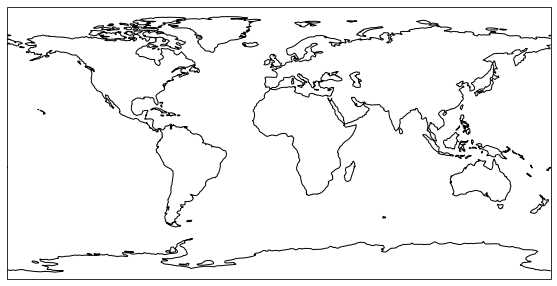

In [2]:
# Creating a map can be as simple as:
fig = plt.figure(figsize=(10, 5))
# Create axis with a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Draw coastlines
ax.coastlines()


#### This map is a bit boring, so let's add some colors:

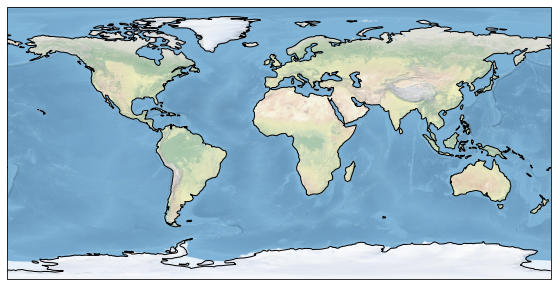

In [3]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

### Cartopy has multiple [projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html):
The following examples will include:
- PlateCarree
- Robinson
- Orthographic
- Sinusoidal
- UTM (@Paige mentioned interest on this projection)

### Let's start with a Robinson projection:

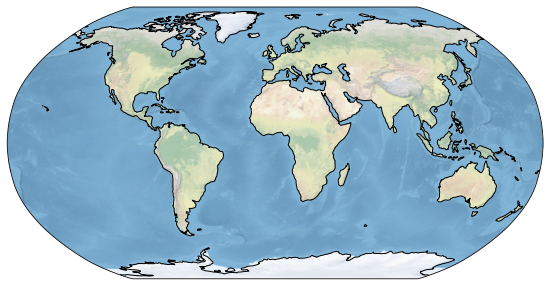

In [4]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

### Time to play arround with other projections!

Clue: Replace the argument projection with any of the projections availabe at:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

In [5]:
# Experiment 1


In [6]:
# Experiment 2


Remember UTM projections need a zone, after that zone things will be strongly deformed. 

In [7]:
class EAfricaPP(ccrs.UTM):
    """
    UTM Zone 33 projection for Africa domain.

    Ellipsoid is International 1924, Datum is ED50.

    """
    def __init__(self):
        globe = ccrs.Globe(ellipse='intl')
        super().__init__("30N", globe=globe)

    @property
    def x_limits(self):
        return (-1e6, 8.5e6)

    @property
    def y_limits(self):
        return (-5e6, 4.3e6)

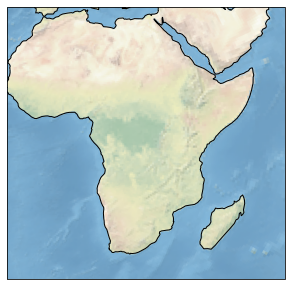

In [8]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=EAfricaPP())
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

**Can you spot what is wrong?** UTM projections are not recommended to use in an area as big as the one we showed, in fact, the most UTM have a true scale around $\pm$ 3° from the central coordinate.

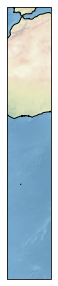

In [9]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM("30N"))
# Default topography image
ax.stock_img()
# Draw coastlines
ax.coastlines()

projection_extend = ax.get_extent()
ax.set_extent([projection_extend[0], projection_extend[1], -5e6, 4.3e6], crs=ccrs.UTM(zone="30N"))

You can play changing the UTM coordinates, by changing the values of the `ax.set_extend` function. The projection extend is specified bellow:

In [10]:
projection_extend

(-250000.0, 1250000.0, -10000000.0, 25000000.0)

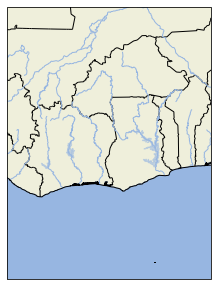

In [11]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM("30N"))
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
# Draw coastlines
ax.coastlines()

projection_extend = ax.get_extent()
ax.set_extent([717912.57-10e5, 717912.57+10e5, 878906.19-10e5,878906.19+10e5], crs=ccrs.UTM(zone="30N"))

In [12]:
class GhanaUTM(ccrs.UTM):
    """
    UTM Zone 30N projection for Africa domain.

    Ellipsoid is International 1924, Datum is ED50.

    """
    def __init__(self,space_surrounding=5e5):
        globe = ccrs.Globe(ellipse='intl')
        super().__init__("30N", globe=globe)
        self.ghana_coord=[717912.57, 878906.19]
        self.space_surrounding = space_surrounding

    @property
    def x_limits(self):
        return (self.ghana_coord[0]-self.space_surrounding, self.ghana_coord[0]+self.space_surrounding)

    @property
    def y_limits(self):
        return (self.ghana_coord[1]-self.space_surrounding, self.ghana_coord[1]+self.space_surrounding)

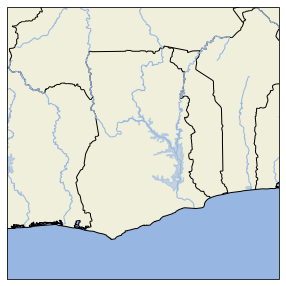

In [13]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=GhanaUTM(space_surrounding=5e5))
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

## Now we are ready to plot some gridded data on top of the maps:

In [14]:
#Import library to read netCDFs
import xarray as xr

#### Load mean SST data from NOAA

This dataset is stored in the /shared folder on the JupyterHub.

In [15]:
# Lazy opening of dataset.
# Lazy means means that only the metadata of the netcdf is read. 
monthly_mean_sst = xr.open_dataset('../shared/sst.mnmean.nc')

In [16]:
# Compute mean over record.
mean_sst = monthly_mean_sst.mean('time').sst

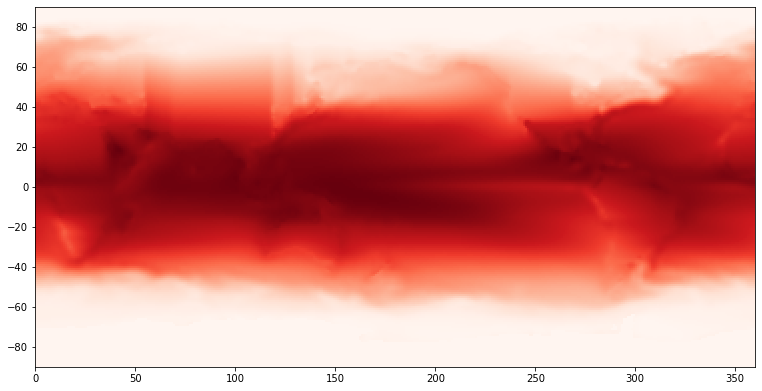

In [17]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1])
# Plot data
plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,cmap='Reds',shading='auto')

#### This is horrible, let's use cartopy!

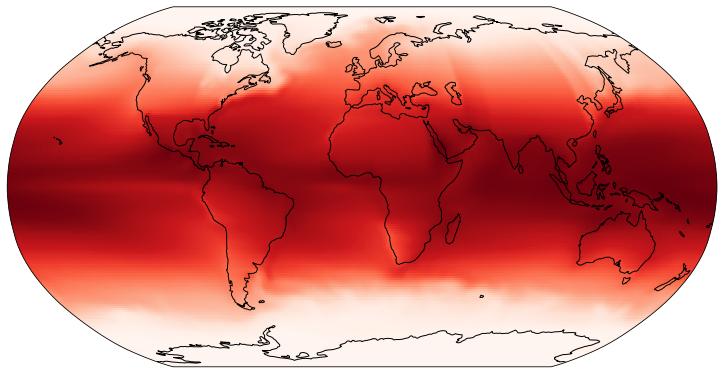

In [18]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Robinson())
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Draw coastlines
ax.coastlines()

#### We don't expect to have Sea surface temperature over the continents, so let's mask the land.

In [19]:
# Import map features such as land, continents, contry boundaries and other.
import cartopy.feature as cfeature

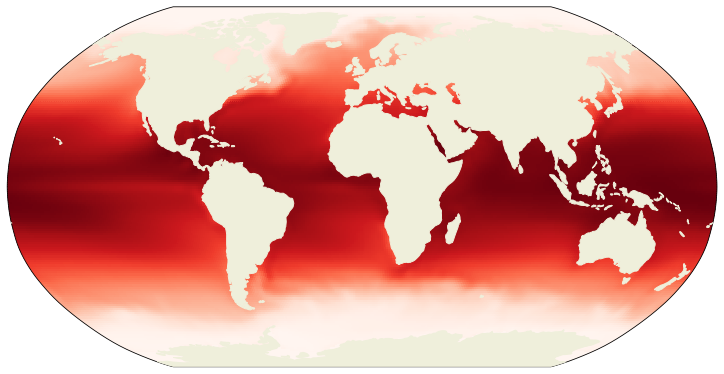

In [20]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Robinson())
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Draw continents
ax.add_feature(cfeature.LAND,zorder=10)

#### With that continental feature, we cant differentiate between low temperatures and the continentes, so let's customize a bit more our map.

First, we will create some custom features:

In [21]:
# Create country boundaries using Natural Earth Features: https://www.naturalearthdata.com
countries = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', 
                                        scale='110m',
                                        edgecolor='black',
                                        facecolor='none')

# Create continents mask with 50 meter resolution data
land_50m = cfeature.NaturalEarthFeature('physical', 'land', 
                                        scale='50m',
                                        edgecolor='face',
                                        facecolor='gray')

# Create continents mask with 10 meter resolution data
land_10m = cfeature.NaturalEarthFeature('physical', 'land', 
                                        scale='10m',
                                        edgecolor='face',
                                        facecolor='gray')

# Create ocean mask
oceans_50m = cfeature.NaturalEarthFeature('physical', 'ocean', 
                                        scale='50m',
                                        edgecolor='face',
                                        facecolor='stealblue')

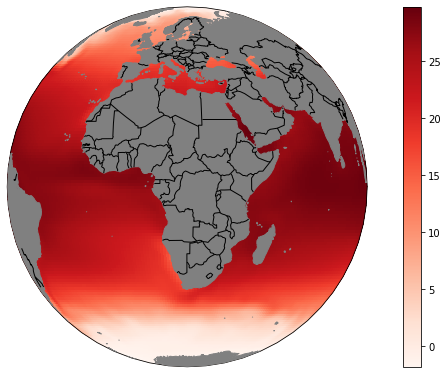

In [22]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add figure axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Orthographic(20, -0))
# Plot data
p = plt.pcolormesh(mean_sst.lon,mean_sst.lat,mean_sst,transform=ccrs.PlateCarree(),cmap='Reds')
# Add land feature
ax.add_feature(land_50m, zorder=10)
# Add countries feature
ax.add_feature(countries,zorder=11)
# Add colorbar
plt.colorbar()

#### `xarray` is a package that natively allows users to plot using cartopy

Note that by default xarray deals with the same issue.

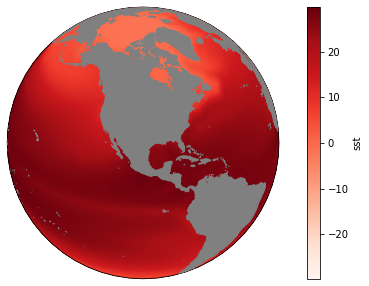

In [23]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Orthographic(-100, 30), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds')
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

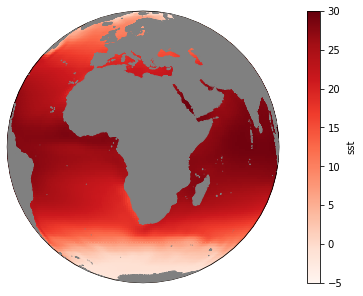

In [24]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Orthographic(20, -0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=-5,vmax=30)
# Add land feature
p.axes.add_feature(land_10m, zorder=10)

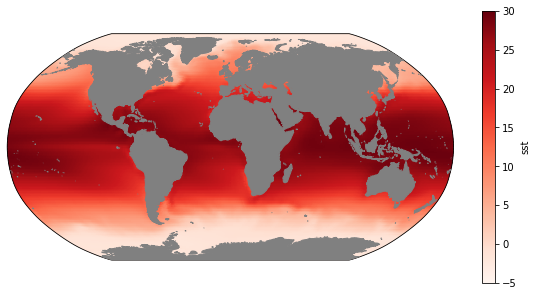

In [25]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = mean_sst.plot(subplot_kws=dict(projection=ccrs.Robinson(central_longitude = 0), facecolor="gray"), transform=ccrs.PlateCarree(),cmap='Reds',vmin=-5,vmax=30)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

#### Now let's plot only a section of the data:

In [26]:
# Rotate coordinates from 0-360 degrees to -180 to 180.
mean_sst_rotate_coords = mean_sst.assign_coords(lon=(((mean_sst.lon + 180) % 360) - 180)).sortby('lon')
# Slice data
SST_atlantic_ocean = mean_sst_rotate_coords.sel({'lat':slice(30,-50),'lon':slice(-50,40)})

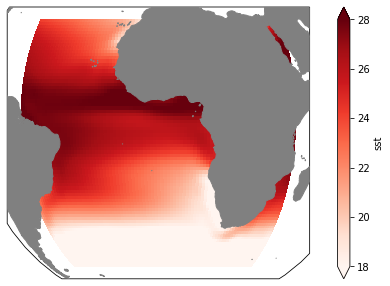

In [27]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0)), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)

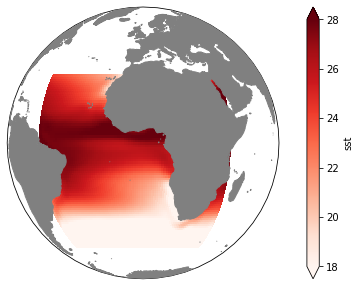

In [28]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0)), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)
# Set extent of map to global
p.axes.set_global()

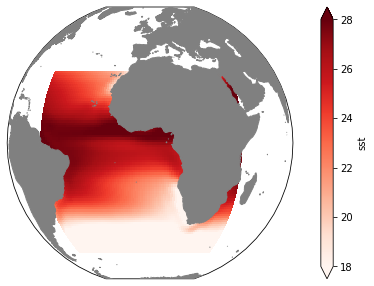

In [29]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Plot data
p = SST_atlantic_ocean.plot(subplot_kws=dict(projection=ccrs.Orthographic(central_longitude = 0)), transform=ccrs.PlateCarree(),cmap='Reds',vmin=18,vmax=28)
# Add land feature
p.axes.add_feature(land_50m, zorder=10)
# Set extent of map allows to select the coordinates of the map (Similar result as before).
p.axes.set_extent((-89,89,-89,89))

### Now let's create our own projection:

We will explore Myriahedral projections. 

Have a look here to learn more about them:
https://philogb.github.io/page/myriahedral/.

Here we will reproduce the Cylindrical myriahedral projection, however some of the other projections will be significantly more challenging.

The Cylindrical Myriahedral projection is a natural development from a Sinusoidal projection, therefore, we will start ploting the data in a sinusoidal projection.

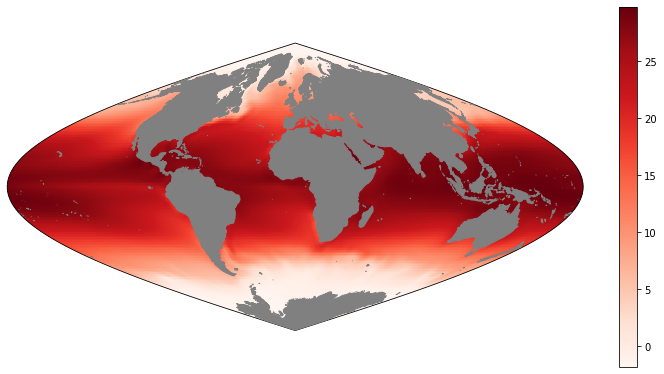

In [30]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))
# Plot data
p = plt.pcolormesh(mean_sst_rotate_coords.lon,mean_sst_rotate_coords.lat,mean_sst_rotate_coords,transform=ccrs.PlateCarree(),cmap='Reds')
# Set extent of map.
ax.set_global()
# Add land feature
ax.add_feature(land_50m, zorder=10)
# Add colorbar
plt.colorbar()

Now we set the extend of the plot to only obtain the width of a gore, in this case -15° to 15°

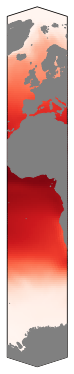

In [31]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Add axes
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))
# Plot data
p = plt.pcolormesh(mean_sst_rotate_coords.lon,mean_sst_rotate_coords.lat,mean_sst_rotate_coords,transform=ccrs.PlateCarree(),cmap='Reds')
# Set extent of map to slice data.
ax.set_extent((-15,15,-90,90))
# Add land feature
ax.add_feature(land_50m, zorder=10)

In order to mask the data we have to provide a boundary to the map:

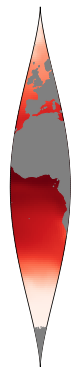

In [32]:
# Import additional libraries to construct Myriahedral projection
import numpy as np 
import matplotlib.path as mpath
import matplotlib.patches as mpatches

# Create figure and axes
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1], projection=ccrs.Sinusoidal(0))

# Geometry of ellipse to bound map.
theta = np.linspace(-np.pi, np.pi, 100)
psi = np.linspace(-np.pi, np.pi, 100)
r, R = 15, 90
verts = np.vstack([ r * np.cos(theta), -R *np.sin(psi) ]).T

bound = mpath.Path(verts)
# Set bounds to map.
ax.set_boundary(bound,ccrs.PlateCarree(0))

# Slice data to region of interest
data = mean_sst_rotate_coords.sel(lon=slice(-15,15))
# Plot data
p = plt.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap='Reds')

# Add land
ax.add_feature(land_50m, zorder=10)


Now let's create all the gores.

In [33]:
# Define a function to generate the gore boundary.
def gore_boundary(gore_width):
    # Sphere coordinates
    theta = np.linspace(-np.pi, np.pi, 100)
    psi = np.linspace(-np.pi, np.pi, 100)
    r, R = gore_width/2, 90
    # Ellipse verts
    verts = np.vstack([ r * np.cos(theta), - R *np.sin(psi) ]).T
    # Bounding path
    bound = mpath.Path(verts)
    return bound

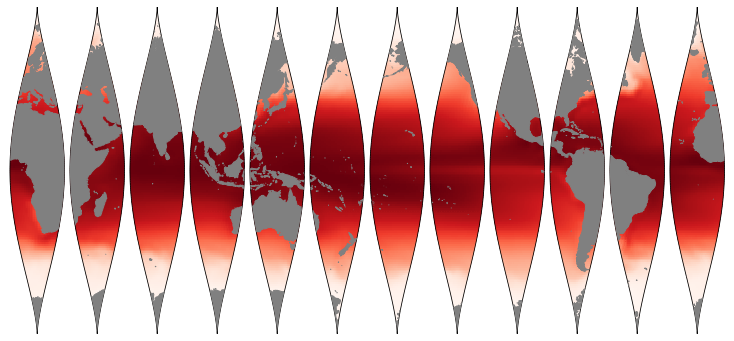

In [34]:
import numpy as np 
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(10, 5))

# Width of gorges 
gore_width = 30
gores = 360//gore_width

for ii in range(gores):
    # Project data into Sinusoidal projection.
    ax = fig.add_axes([ii*(1/gores),0,1/gores,1], projection=ccrs.Sinusoidal(ii*(gore_width)+gore_width/2))
    # Set boundary according to an ellipse of radius r and R
    ax.set_boundary(gore_boundary(gore_width),ccrs.PlateCarree(ii*(gore_width)+gore_width/2))
    # Slice data
    data = mean_sst.sel(lon=slice(ii*(gore_width),ii*(gore_width)+gore_width))
    # Pcolormesh data over map
    p = plt.pcolormesh(data.lon,data.lat,data,transform=ccrs.PlateCarree(),cmap='Reds')
    # Add land to each subplot
    ax.add_feature(land_50m, zorder=10)

### Now you can play with different projections and the cyldrical Myriahedral projection.

# GeoPandas & Cartopy

In [35]:
import geopandas as gpd

Let's look at some geojson data from http://www.ecreee.org/.

More data can be found at: https://open.africa/.

For Ghana: (https://open.africa/group/ghana)

### Let's first explore the data.

In [36]:
electical_system = gpd.read_file("/Users/josue/Downloads/ghana_electrical.geojson")
electical_system.crs = "EPSG:4326"
electical_system.head()

,voltage_kV,year,status,source,country,length_km,geometry
0,161,2000.0,Existing,ECREEE,Ghana,70,"LINESTRING (0.55247 6.26034, 0.71815 6.22811, ..."
1,161,2000.0,Existing,ECREEE,Ghana,13,"LINESTRING (-0.20408 5.60745, -0.20391 5.60772..."
2,161,2000.0,Existing,ECREEE,Ghana,13,"LINESTRING (0.00234 5.69562, 0.00198 5.69653, ..."
3,161,2000.0,Existing,ECREEE,Ghana,60,"LINESTRING (-1.65830 4.97354, -1.65834 4.97389..."
4,161,2000.0,Existing,ECREEE,Ghana,13,"LINESTRING (-1.73567 4.96059, -1.73508 4.96077..."


We can plot histograms, a particular field. `GeoPandas` uses a syntax similar to `Pandas`.

<AxesSubplot:>

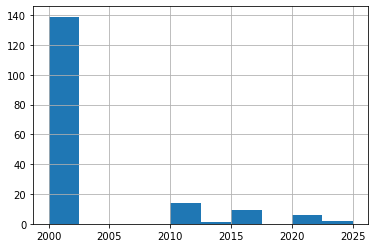

In [37]:
electical_system['year'].hist(bins=10)

### Let's combine what we have learnt (`Cartopy`, `Pandas`) + `GeoPandas`

In [38]:
import matplotlib.ticker as mticker

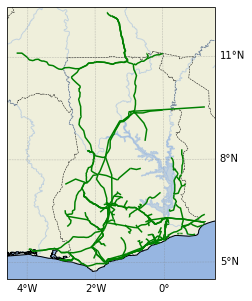

In [39]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = GhanaUTM(space_surrounding=5e5)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = electical_system.to_crs(proj.proj4_init)

data2plot.plot(ax=ax,linestyle='-',color='g')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-4,1,2))
gl.ylocator = mticker.FixedLocator(np.arange(5,13,3))

# Remove legends on different sides of map
gl.top_labels = False
gl.left_labels = False
# gl. bottom_labels = False
# gl.right_labels =False

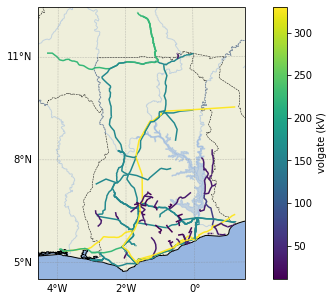

In [40]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = GhanaUTM(space_surrounding=5e5)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = electical_system.to_crs(proj.proj4_init)

data2plot.plot( ax=ax, column='voltage_kV', linestyle='-', legend=True, legend_kwds={'label': "volgate (kV)"})

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-4,1,2))
gl.ylocator = mticker.FixedLocator(np.arange(5,13,3))

# Remove legends on different sides of map
gl.top_labels = False
# gl.left_labels = False
# gl. bottom_labels = False
gl.right_labels =False

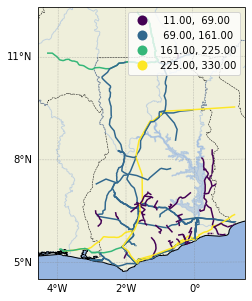

In [41]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = GhanaUTM(space_surrounding=5e5)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = electical_system.to_crs(proj.proj4_init)

data2plot.plot(column='voltage_kV', scheme='natural_breaks', k=4, ax=ax,linestyle='-',legend=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-4,1,2))
gl.ylocator = mticker.FixedLocator(np.arange(5,13,3))

# Remove legends on different sides of map
gl.top_labels = False
# gl.left_labels = False
# gl. bottom_labels = False
gl.right_labels =False

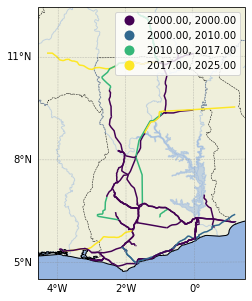

In [42]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = GhanaUTM(space_surrounding=5e5)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = electical_system.to_crs(proj.proj4_init)

data2plot.plot(column='year', scheme='natural_breaks', k=4, ax=ax,linestyle='-',legend=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-4,1,2))
gl.ylocator = mticker.FixedLocator(np.arange(5,13,3))

# Remove legends on different sides of map
gl.top_labels = False
# gl.left_labels = False
# gl. bottom_labels = False
gl.right_labels =False

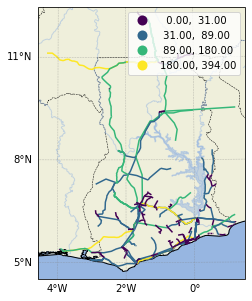

In [43]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = GhanaUTM(space_surrounding=5e5)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = electical_system.to_crs(proj.proj4_init)

data2plot.plot(column='length_km', scheme='natural_breaks', k=4, ax=ax,linestyle='-',legend=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-4,1,2))
gl.ylocator = mticker.FixedLocator(np.arange(5,13,3))

# Remove legends on different sides of map
gl.top_labels = False
# gl.left_labels = False
# gl. bottom_labels = False
gl.right_labels =False

## Shape files in GeoPandas

GeoPandas also supports `shp` files, `csv` and other formats.
Another interesting tutorial can be found at: https://www.datacamp.com/community/tutorials/geospatial-data-python


In [45]:
# We use a PySAL example shapefile
import libpysal as ps

In [46]:
avail_examples = ps.examples.available()
avail_examples

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


Select an example (i.e. Nepal):

In [47]:
nepal = ps.examples.load_example("Nepal")
nepal.get_file_list()

['/Users/josue/pysal_data/Nepal/nepal.shp',
 '/Users/josue/pysal_data/Nepal/nepal.shx',
 '/Users/josue/pysal_data/Nepal/nepal.dbf',
 '/Users/josue/pysal_data/Nepal/nepal.prj']

In [48]:
# More info of the dataset
nepal.explain_url

'https://geodacenter.github.io/data-and-lab//nepal/'

Now let's load the shape file of the example:

In [49]:
pth = ps.examples.get_path("nepal.shp")
aid_nepal = gpd.GeoDataFrame.from_file(pth)
aid_nepal.head()

,id,name_1,name_2,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,...,HEALTDAMT,HUMDAMT,INDDAMT,MULTDAMT,SOCDAMT,TOURDAMT,TRANDAMT,WATDAMT,TOTDAMT,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,573,25613,42.9,...,3584409,172736,369324,8050858,1308661,0,15421,1996315,32542286,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,1922,85957,54.7,...,2253911,172736,0,3712798,633763,0,15421,0,14427364,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,Dhaualagiri,Myagdi,30.03,28.54,636,1028,45986,47.5,...,2279653,172736,369324,11784759,964089,0,2688597,854545,31437665,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,Dhaualagiri,Parbat,21.84,24.62,627,1013,45289,26.2,...,26574,0,369324,4741985,0,0,0,667767,10439874,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,1379,61686,26.9,...,1338957,172736,0,2421424,1652237,0,16431544,23818495,49073311,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


In [50]:
# Print all column names
aid_nepal.columns

Index(['id', 'name_1', 'name_2', 'district', 'depecprov', 'povindex', 'pcinc',
       'pcincppp', 'pcincmp', 'malkids', 'lif40', 'nosafh20', 'population',
       'boyg1_5', 'girlg1_5', 'kids1_5', 'schoolcnt', 'schlpkid', 'schlppop',
       'ad_illit', 'ad_ilgt50', 'lon', 'lat', 'AGCAMT', 'BANKCAMT', 'BUDGCAMT',
       'COMMCAMT', 'CONCAMT', 'EDUCAMT', 'ENGYCAMT', 'ENVCAMT', 'FORCAMT',
       'GOVCAMT', 'HEALTCAMT', 'HUMCAMT', 'INDCAMT', 'MULTCAMT', 'SOCCAMT',
       'TOURCAMT', 'TRANCAMT', 'WATCAMT', 'TOTCAMT', 'AGDAMT', 'BANKDAMT',
       'BUDGDAMT', 'COMMDAMT', 'CONDAMT', 'EDUDAMT', 'ENGYDAMT', 'ENVDAMT',
       'FORDAMT', 'GOVDAMT', 'HEALTDAMT', 'HUMDAMT', 'INDDAMT', 'MULTDAMT',
       'SOCDAMT', 'TOURDAMT', 'TRANDAMT', 'WATDAMT', 'TOTDAMT', 'geometry'],
      dtype='object')

<AxesSubplot:>

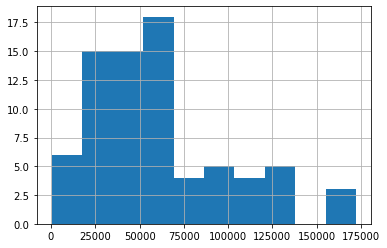

In [51]:
aid_nepal['kids1_5'].hist(bins=10)

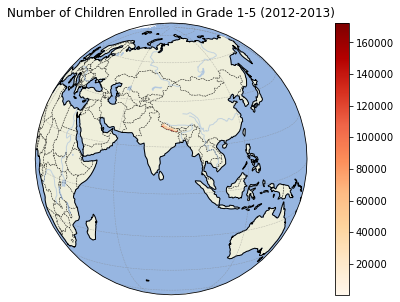

In [52]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = ccrs.Orthographic(85, 15)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = aid_nepal.to_crs(proj.proj4_init)

data2plot.plot(column='kids1_5', cmap='OrRd', ax=ax,linestyle='-',legend=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.set_title('Number of Children Enrolled in Grade 1-5 (2012-2013)')
ax.set_global()

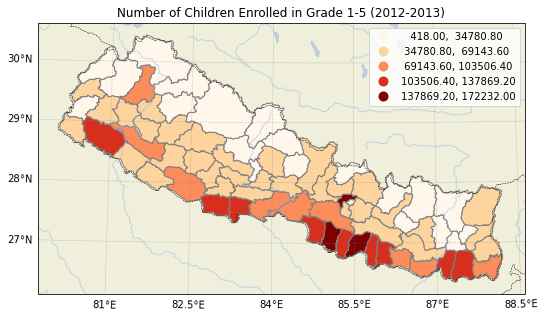

In [53]:
fig = plt.figure(figsize=(10, 5))
# Another way to create an axis with a map projection
proj = ccrs.Orthographic(85, 15)

ax = fig.add_subplot(1, 1, 1, projection=proj)
                      
# Default topography image
ax.add_feature(cfeature.BORDERS, linestyle='--',linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS,alpha=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)
# Draw coastlines
ax.coastlines()

data2plot = aid_nepal.to_crs(proj.proj4_init)

data2plot.plot(column='kids1_5',  scheme='equal_interval', k=5, cmap='OrRd', 
               ax=ax,linestyle='-',legend=True, edgecolor='gray')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.set_title('Number of Children Enrolled in Grade 1-5 (2012-2013)');
# Remove legends on different sides of map
gl.top_labels = False
# gl.left_labels = False
# gl. bottom_labels = False
gl.right_labels =False

Check https://geopandas.org/gallery/choropleths.html to continue exploring different data.

### Let's query data and create a simple animation.

In [54]:
# Get the natural earth low resolution dataset included in GeoPandas
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

<GeoAxesSubplot:>

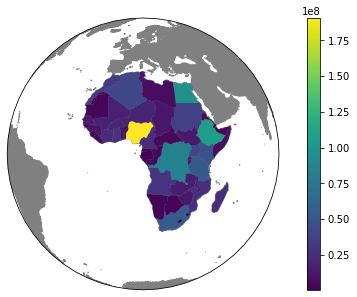

In [55]:
# Create figure
fig = plt.figure(figsize=(10, 5))
# Mapping projection
proj=ccrs.Orthographic(central_longitude = 10)
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add land feature
ax.add_feature(land_50m, zorder=-1)
# Set extent of map allows to select the coordinates of the map (Similar result as before).
ax.set_global()

# We can query data and fields.
africa = world.query('continent == "Africa"')

data2plot = africa.to_crs(proj.proj4_init)

data2plot.plot(ax=ax, column='pop_est', legend=True)

If you would like to make an animation, you can do something like: 

You can also look into geoplot, which integrates better with geopandas. 
> Sometimes works, sometimes it doesn't. You need to make sure you have installed all the right jupyter notebook libraries.  

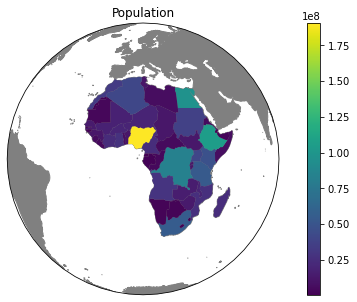

In [56]:
from IPython.display import clear_output
import collections
# Create figure

data = collections.defaultdict(list)


def animate_map(data, figsize=(5, 5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    # Mapping projection
    proj=ccrs.Orthographic(central_longitude = data['lon'])
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    # Add land feature
    ax.add_feature(land_50m, zorder=-1)
    # Set extent of map allows to select the coordinates of the map (Similar result as before).
    ax.set_global()

    # We can query data and fields.
    africa = world.query('continent == "Africa"')

    data2plot = africa.to_crs(proj.proj4_init)

    data2plot.plot(ax=ax, column='pop_est', legend=True)
    plt.title(title)
    # To save all images uncomment next line:
    # plt.savefig('map_{0}.png'.format(data['lon']))
    plt.show()
    
# Number of degrees to rotate, increase the number to rotate more.  
for lon in np.arange(10):
    data['lon'] = lon
    animate_map(data,figsize=(10, 5), title="Population")